In [13]:
TU.data<- read.csv("D:RE72.csv",header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))

In [14]:
str(TU.data)

'data.frame':	2744 obs. of  21 variables:
 $ X.1         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X           : int  17 20 22 23 28 34 46 47 55 61 ...
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "18a Mollison St" "403/609 Victoria St" "25/84 Trenerry Cr" "106/119 Turner St" ...
 $ Rooms       : int  2 2 2 1 1 2 1 1 3 2 ...
 $ Type        : chr  "t" "u" "u" "u" ...
 $ Price       : num  745000 542000 760000 481000 500000 ...
 $ Method      : chr  "S" "S" "SP" "SP" ...
 $ SellerG     : chr  "Jellis" "Dingle" "Biggin" "Purplebricks" ...
 $ Date        : chr  "8/10/2016" "8/10/2016" "10/12/2016" "10/12/2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Car         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Landsize    : num  469 469 469 469 469 ...
 $ Build

In [15]:
TU.data2 <- TU.data[c(-1,-2,-3,-4,-8,-9,-11,-18,-19,-20)] #removed unnecessary columns
str(TU.data2)

'data.frame':	2744 obs. of  11 variables:
 $ Rooms       : int  2 2 2 1 1 2 1 1 3 2 ...
 $ Type        : chr  "t" "u" "u" "u" ...
 $ Price       : num  745000 542000 760000 481000 500000 ...
 $ Date        : chr  "8/10/2016" "8/10/2016" "10/12/2016" "10/12/2016" ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Car         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Landsize    : num  469 469 469 469 469 ...
 $ BuildingArea: num  147 147 147 147 147 ...
 $ Longtitude  : num  NA NA NA NA NA ...


In [16]:
TU.data1<-factor(c(TU.data2$Type))

In [17]:
str(TU.data1)

 Factor w/ 2 levels "t","u": 1 2 2 2 2 1 2 2 1 2 ...


In [18]:
library("openxlsx")
library(dplyr)

In [22]:
TU <- mutate(TU.data, TypeValue = ifelse(TU.data2$Type == "t",0,1))

In [23]:
str(TU)

'data.frame':	2744 obs. of  22 variables:
 $ X.1         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X           : int  17 20 22 23 28 34 46 47 55 61 ...
 $ Suburb      : chr  "Abbotsford" "Abbotsford" "Abbotsford" "Abbotsford" ...
 $ Address     : chr  "18a Mollison St" "403/609 Victoria St" "25/84 Trenerry Cr" "106/119 Turner St" ...
 $ Rooms       : int  2 2 2 1 1 2 1 1 3 2 ...
 $ Type        : chr  "t" "u" "u" "u" ...
 $ Price       : num  745000 542000 760000 481000 500000 ...
 $ Method      : chr  "S" "S" "SP" "SP" ...
 $ SellerG     : chr  "Jellis" "Dingle" "Biggin" "Purplebricks" ...
 $ Date        : chr  "8/10/2016" "8/10/2016" "10/12/2016" "10/12/2016" ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Car         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Landsize    : num  469 469 469 469 469 ...
 $ Build

In [24]:
log.model1 <- glm(TypeValue ~ Price+Rooms, data=TU,family=binomial)

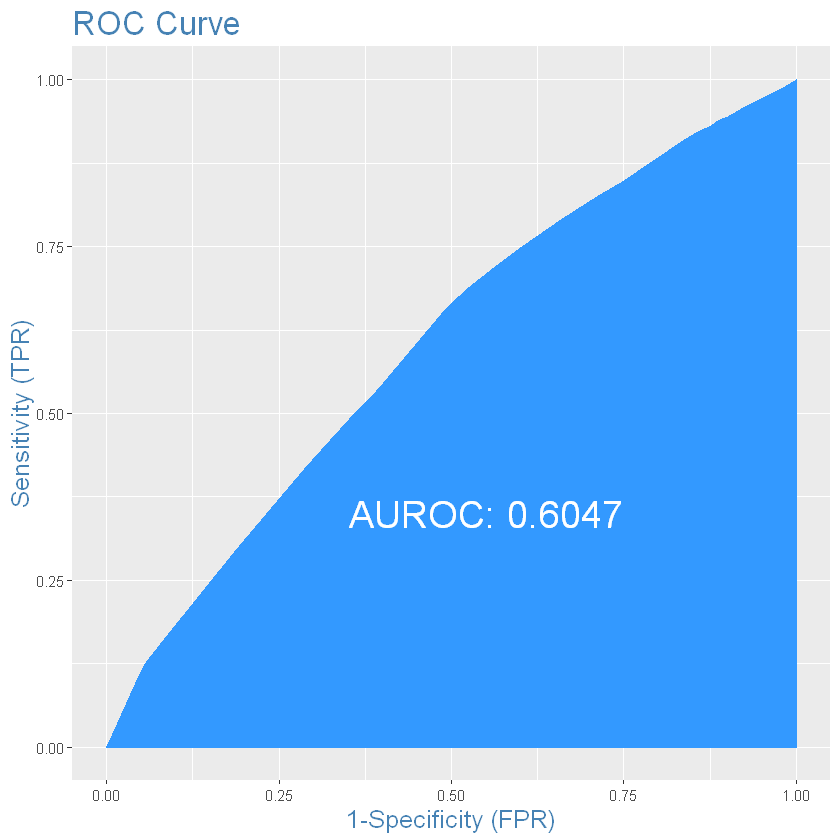

In [26]:
library(InformationValue)
predicted1<- predict(log.model1, TU, type="response")  # predicted scores
#predictedU
plotROC(TU, predicted1)

In [27]:
confusionMatrix(TU$TypeValue, predicted1 >= 0.5)

,0,1
0,951,371
1,326,1096


In [28]:
sensitivity(TU$TypeValue, predicted1, threshold = 0.5)
specificity(TU$TypeValue, predicted1, threshold = 0.5)

[1] 0.7471029

[1] 0.7447142

In [29]:
pricedata <- data.frame(Price=seq(min(TU$Price), max(TU$Price),len=6736))
pricedata <- mutate(pricedata, Rooms=seq(min(TU$Rooms),max(TU$Rooms),len=6736))

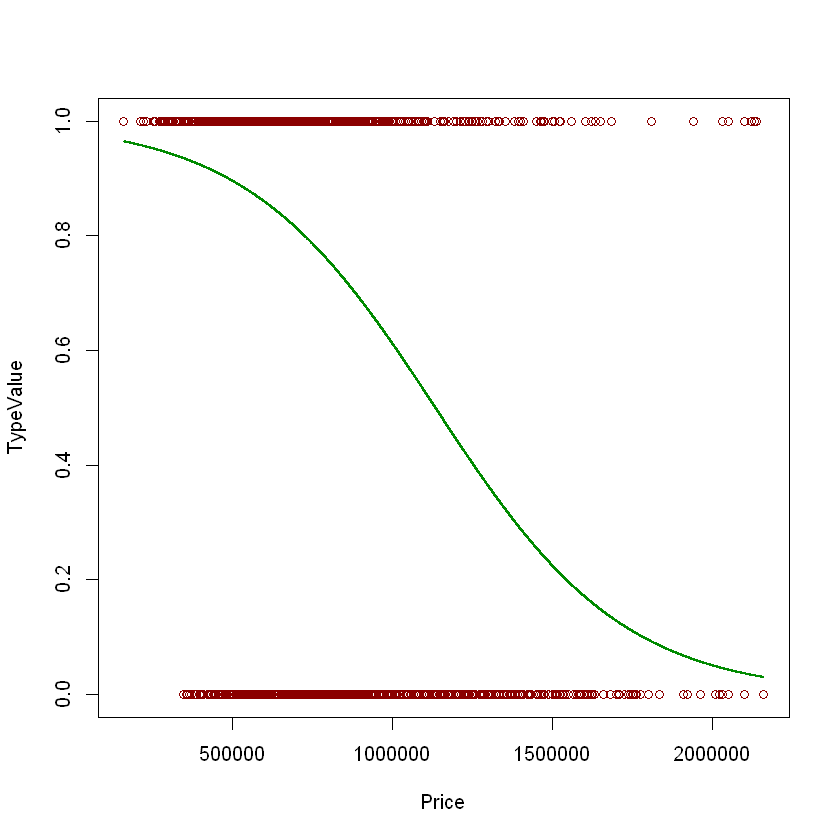

In [30]:
pricedata$TypeValue<- predict(log.model1,newdata=pricedata,type='response')

plot(TypeValue~Price,data=TU,col="red4",ylim=c(0,1))

lines(TypeValue ~ Price, pricedata, col="green4", lwd=2)